<a href="https://www.kaggle.com/code/ankitbharti07/tata-motors-stock-details-1995-2025?scriptVersionId=261633214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display: flex; align-items: center; background: linear-gradient(135deg, #002D62, #00537E); color: white; padding: 25px; border-radius: 8px; box-shadow: 0 4px 12px 0 rgba(0,0,0,0.3);">
    
 <div style="flex: 0 0 150px; text-align: center; margin-right: 25px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Tata_logo.svg/1280px-Tata_logo.svg.png" width="120" alt="Tata Logo" style="background-color: white; border-radius: 50%; padding: 5px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.2);">
    </div>
    
 <div style="flex: 1; border-left: 1px solid #FFFFFF50; padding-left: 25px;">
        <h1 style="margin: 0; font-family: 'Georgia', serif; font-size: 28px; font-weight: bold; letter-spacing: 1px;">
            Exploratory Data Analysis
        </h1>
   <h2 style="margin: 10px 0; font-family: 'Helvetica', sans-serif; font-weight: 300; font-size: 22px; opacity: 0.9;">
            TATA MOTORS (1995-2025)
        </h2>
 <p style="margin-top: 15px; font-size: 12px; opacity: 0.7;">
            Last Updated: 13 September 2025
        </p>
    </div>
</div>

<h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; box-shadow: 0 3px 6px rgba(0,0,0,0.25);">
    📥 Step 1: Load the Dataset & Libraries
</h2>

<hr style="border: 1px solid #00537E;">

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Import forecasting models
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# FIX: Keras is now part of TensorFlow, so we import it from there.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Suppress warnings for a cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
# FIX: Parse dates right at the loading stage for convenience.
df = pd.read_csv('/kaggle/input/tata-motors-stock-details1995-2025/TATAMOTORS_NSE_1995-2025.csv', parse_dates=['Date'], index_col='Date')

# Display the first 5 rows
print("### First 5 rows of the dataset:")
print(df.head())

2025-09-13 16:46:26.798759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757781987.137453      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757781987.231023      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### First 5 rows of the dataset:
            Unnamed: 0      Symbol   Open   High    Low  Close  PrevClose  \
Date                                                                        
1995-01-02         223  TATAMOTORS  517.5  524.7  517.5  524.2      522.0   
1995-01-03         224  TATAMOTORS  518.0  520.0  515.0  515.0      524.2   
1995-01-04         225  TATAMOTORS  515.0  515.0  515.0  515.0      515.0   
1995-01-05         226  TATAMOTORS  480.0  480.0  480.0  480.0      515.0   
1995-01-06         227  TATAMOTORS  495.0  501.0  495.0  498.7      480.0   

            Volume  Turnover    VWAP  Trades  Daily_Return_%  MA_20  MA_50  
Date                                                                        
1995-01-02    1100  573530.0  521.39     NaN        0.421456    NaN    NaN  
1995-01-03    1500  775450.0  516.97     NaN       -1.755055    NaN    NaN  
1995-01-04     300  154500.0  515.00     NaN        0.000000    NaN    NaN  
1995-01-05      50   24000.0  480.00     N

<h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; box-shadow: 0 3px 6px rgba(0,0,0,0.25);">
    📊 Step 2: Data Overview
</h2>

<hr style="border: 1px solid #00537E;">

In [2]:
# Get a concise summary of the dataframe
print("\n### Dataframe Info:")
df.info()

# Generate descriptive statistics
print("\n### Descriptive Statistics:")
print(df.describe())


### Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7804 entries, 1995-01-02 to 2025-08-19
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7804 non-null   int64  
 1   Symbol          7804 non-null   object 
 2   Open            7804 non-null   float64
 3   High            7804 non-null   float64
 4   Low             7804 non-null   float64
 5   Close           7804 non-null   float64
 6   PrevClose       7804 non-null   float64
 7   Volume          7804 non-null   int64  
 8   Turnover        7804 non-null   float64
 9   VWAP            7804 non-null   float64
 10  Trades          3617 non-null   float64
 11  Daily_Return_%  7804 non-null   float64
 12  MA_20           7785 non-null   float64
 13  MA_50           7755 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 914.5+ KB

### Descriptive Statistics:
        Unnamed: 0         Open         

<h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; box-shadow: 0 3px 6px rgba(0,0,0,0.25);">
    🧹 Step 3: Data Cleaning
</h2>

<hr style="border: 1px solid #00537E;">

In [3]:
# Check for missing values
print("\n### Missing Values:")
print(df.isnull().sum())


### Missing Values:
Unnamed: 0           0
Symbol               0
Open                 0
High                 0
Low                  0
Close                0
PrevClose            0
Volume               0
Turnover             0
VWAP                 0
Trades            4187
Daily_Return_%       0
MA_20               19
MA_50               49
dtype: int64


<h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; box-shadow: 0 3px 6px rgba(0,0,0,0.25);">
    📈 Step 4: Univariate Analysis
</h2>

<hr style="border: 1px solid #00537E;">

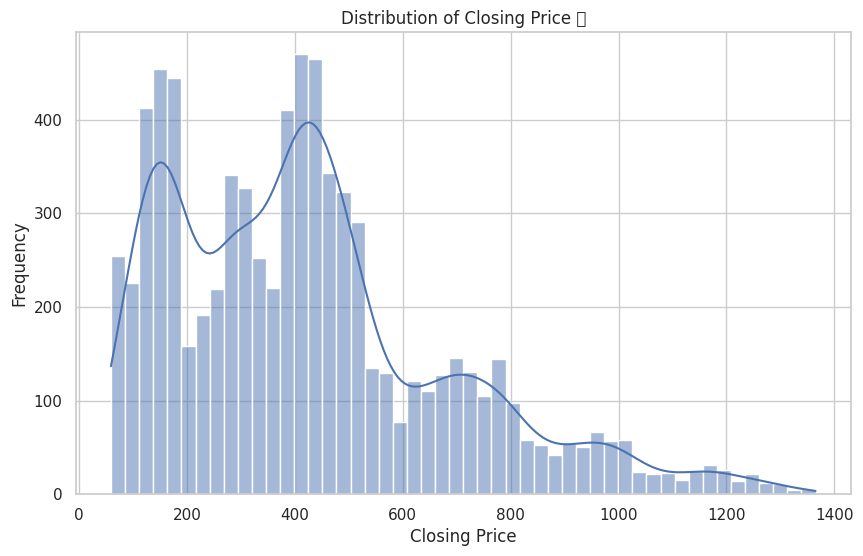

In [4]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of the closing price
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Closing Price 📈')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

<h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; box-shadow: 0 3px 6px rgba(0,0,0,0.25);">
    📉 Step 5: Bivariate Analysis
</h2>

<hr style="border: 1px solid #00537E;">

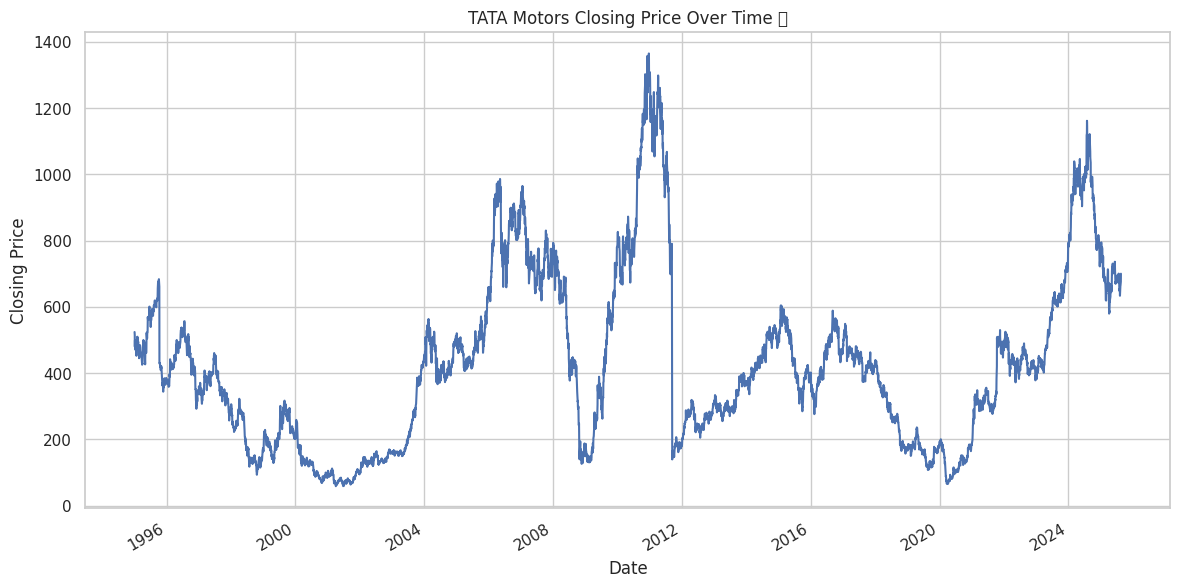

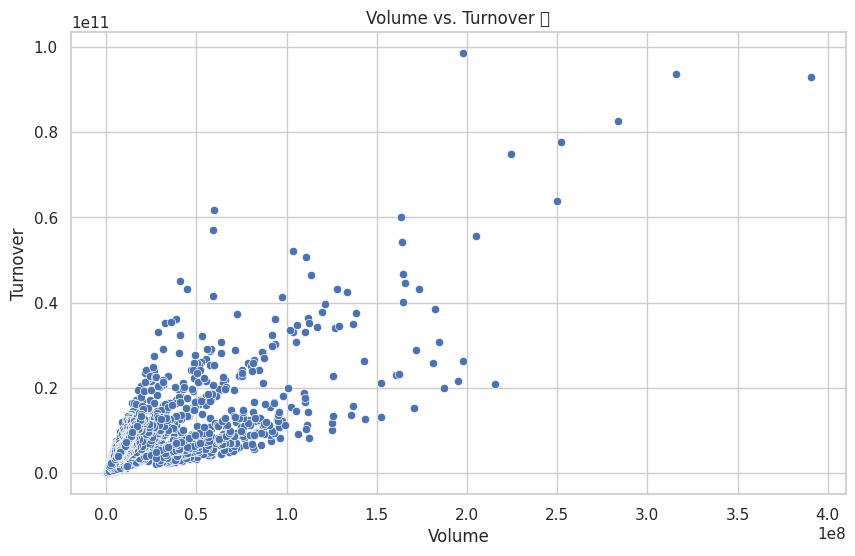

In [5]:
# Plot the closing price over time
# FIX: The 'Date' column is now the index, so we can plot directly.
plt.figure(figsize=(14, 7))
df['Close'].plot()
plt.title('TATA Motors Closing Price Over Time 💹')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Scatter plot of Volume vs. Turnover
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Turnover', data=df)
plt.title('Volume vs. Turnover 🤝')
plt.xlabel('Volume')
plt.ylabel('Turnover')
plt.show()

<h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; box-shadow: 0 3px 6px rgba(0,0,0,0.25);">
    🕸️ Step 6: Multivariate Analysis
</h2>

<hr style="border: 1px solid #00537E;">

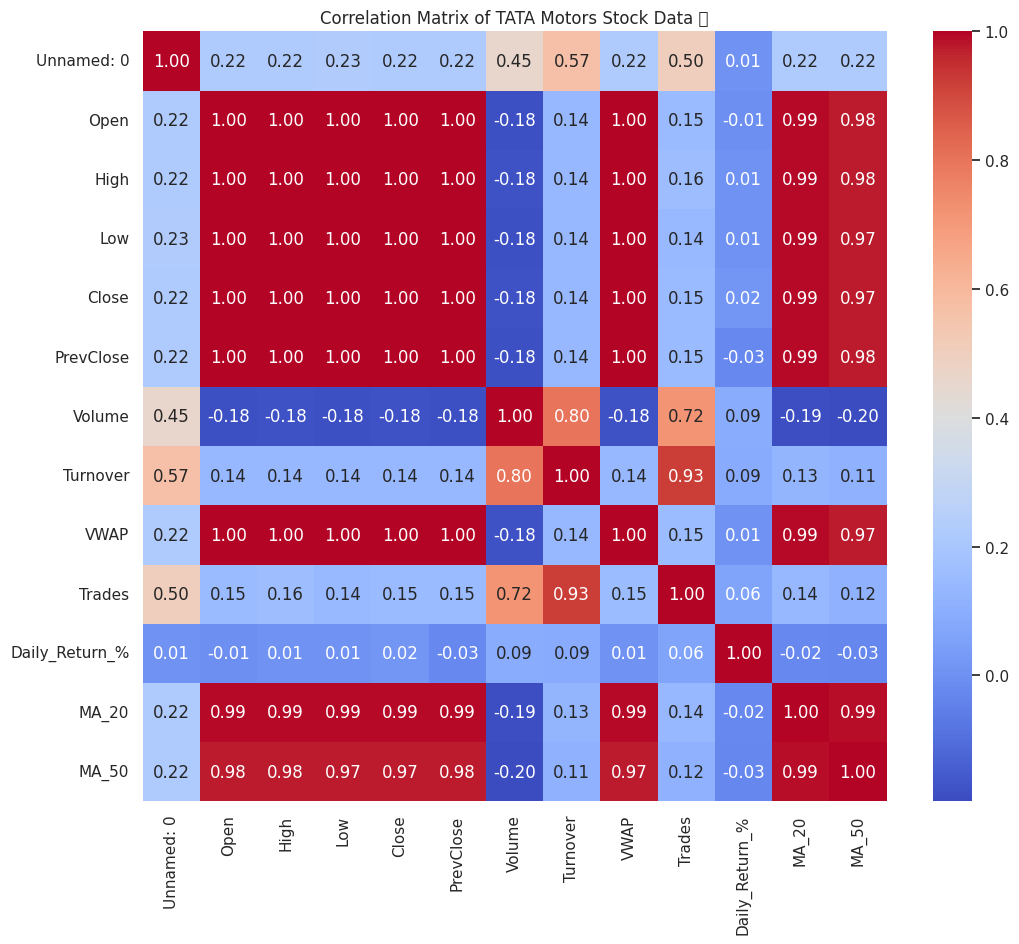

In [6]:
# FIX: Select only numeric columns for the correlation matrix.
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of TATA Motors Stock Data 🔥')
plt.show()

<h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; box-shadow: 0 3px 6px rgba(0,0,0,0.25);">
  

🧠 Cell 7: LSTM Forecasting
</h2>

<hr style="border: 1px solid #00537E;">

 

I0000 00:00:1757782005.315059      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1757782005.315929      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/10


I0000 00:00:1757782010.594522      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0188
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7001e-04
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6935e-04
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3868e-04
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6851e-04
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5271e-04
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5954e-04
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8527e-04
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9518e-04
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8097e-04
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Test RMSE (LSTM): 18.341


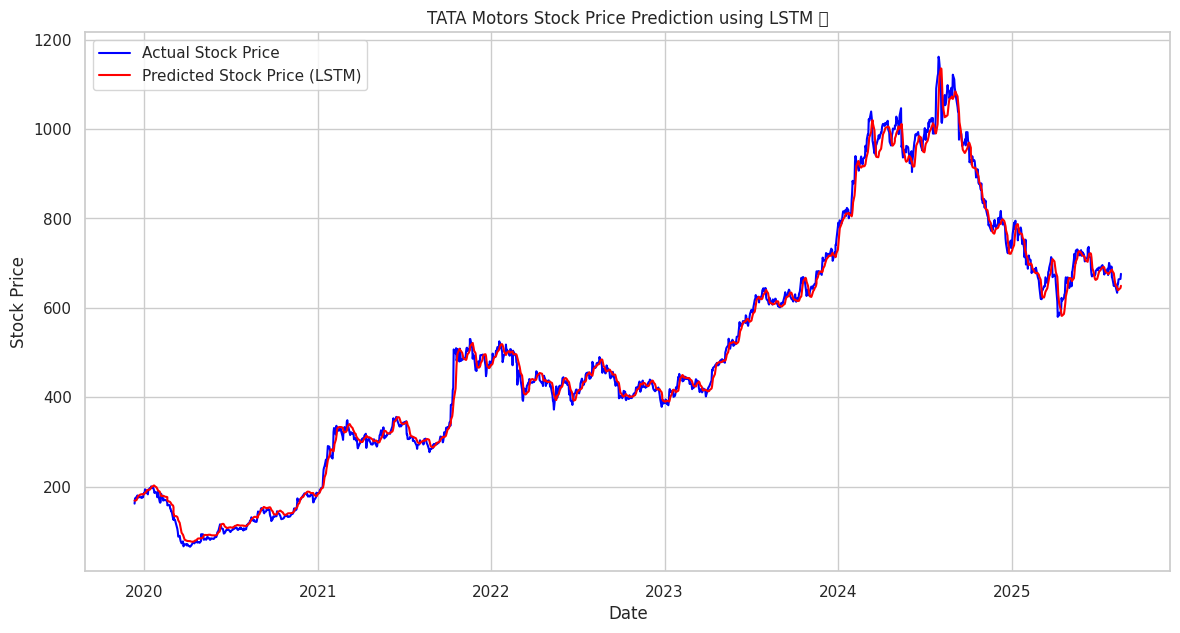

In [7]:
# --- 1. Data Preparation for LSTM ---
# We will focus on the 'Close' price
ts_data = df[['Close']]

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ts_data)

# Create training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Convert an array of values into a dataset matrix for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Reshape data into sequences
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# --- 2. Build and Train the LSTM Model ---
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
# Using 10 epochs for a quick demonstration; more epochs can yield better results.
model.fit(X_train, y_train, batch_size=64, epochs=10)

# --- 3. Make Predictions and Evaluate ---
test_predict = model.predict(X_test)

# Invert the scaling to get actual price predictions
test_predict = scaler.inverse_transform(test_predict)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, test_predict))
print(f'\nTest RMSE (LSTM): {rmse:.3f}')

# --- 4. Visualize the LSTM Forecast ---
# Create a dataframe for plotting
plot_df = pd.DataFrame({
    'Actual': actual_prices.flatten(),
    'Predicted': test_predict.flatten()
}, index=ts_data.index[train_size+time_step+1:])

plt.figure(figsize=(14, 7))
plt.plot(plot_df['Actual'], color='blue', label='Actual Stock Price')
plt.plot(plot_df['Predicted'], color='red', label='Predicted Stock Price (LSTM)')
plt.title('TATA Motors Stock Price Prediction using LSTM 🚀')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

<div style="border: 1px solid #00537E; border-radius: 8px; padding: 25px; background-color: #f7faff; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">

 <h2 style="background-color: #003366; color: white; font-family: 'Helvetica', sans-serif; display: inline-block; padding: 10px 20px; border-radius: 7px; margin-top: 0; margin-bottom: 20px;">
        📝 Step 7: Interpretation of Results
    </h2>

 <div style="font-family: 'Helvetica', sans-serif; color: #333; line-height: 1.6;">
        <p><strong>Based on our analysis:</strong></p>
        <ul style="padding-left: 20px;">
            <li><strong>Price Trends:</strong> The stock has shown significant growth over the years, with periods of volatility. The closing price distribution is skewed, indicating the stock has traded at lower prices for a longer period.</li>
            <br>
            <li><strong>Trading Activity:</strong> The strong positive correlation between Volume and Turnover is expected.</li>
            <br>
            <li><strong>Inter-variable Relationships:</strong> Open, High, Low, and Close prices are, as expected, very highly correlated.</li>
        </ul>
        <p style="margin-top: 20px; border-top: 1px solid #e0e0e0; padding-top: 15px;">
            This EDA provides a solid foundation for more advanced analysis.
        </p>
    </div>

</div>